In [8]:
# 1) Setup & Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql 
import warnings
warnings.filterwarnings('ignore')

In [9]:
# 2) Load Data
df=pd.read_csv("C:/Users/Selva.M/Downloads/data_science/Project_2/ICRISAT-District Level Data - ICRISAT-District Level Data.csv")

In [10]:
df.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [12]:
df.isnull().sum()

Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64

In [13]:
# 3) Convert Units
def convert_units(df,crop_name):
    """Convert crop area & production to smaller units (ha and tons)."""
    area_col = f"{crop_name}_AREA_(1000_HA)"
    prod_col = f"{crop_name}_PRODUCTION_(1000_TONS)"

    if area_col in df.columns:
        df[f"{crop_name}_AREA_(HA)"] = df[area_col] * 1000
    if prod_col in df.columns:
        df[f"{crop_name}_PRODUCTION_(TONS)"] = df[prod_col] * 1000

crops = ["RICE", "WHEAT", "MAIZE", "COTTON", "SUGARCANE", "SOYABEAN", "OILSEEDS"]
for i in crops:
    convert_units(df,i)

In [14]:
df.to_csv("cleaned_agriculture_data.csv", index=False)
print("Cleaned dataset saved as: cleaned_agriculture_data.csv")

Cleaned dataset saved as: cleaned_agriculture_data.csv


In [15]:
# 5) EDA Visualizations
df_clean=pd.read_csv("C:/Users/Selva.M/Downloads/data_science/Project_2/cleaned_agriculture_data.csv")
df_clean.columns = df_clean.columns.str.strip()
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16,5)

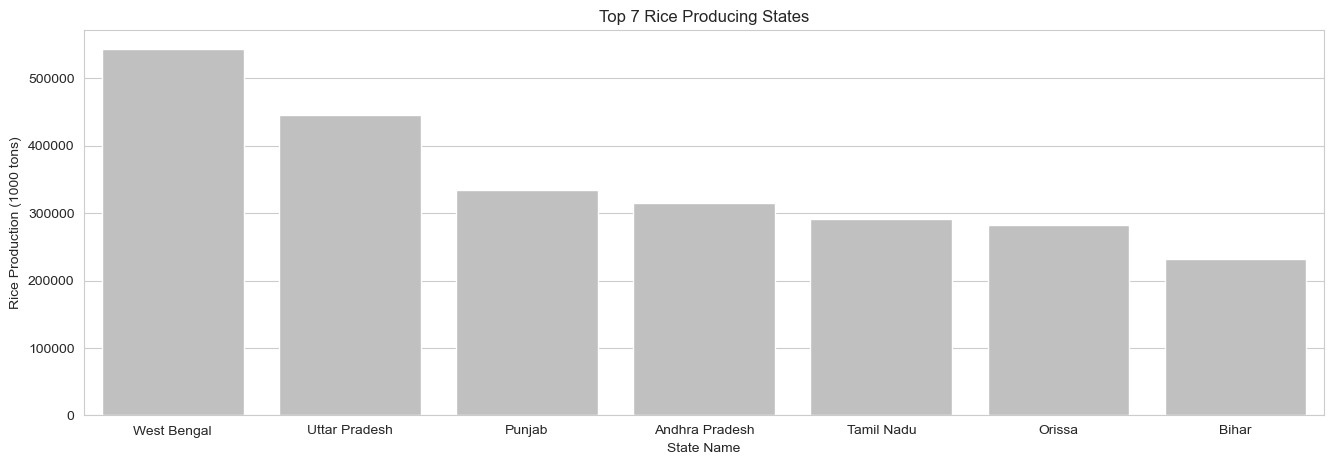

In [16]:
# Top 7 Rice producing states
rice_top7 = df_clean.groupby('State Name')['RICE PRODUCTION (1000 tons)'].sum().sort_values(ascending=False).head(7)
sns.barplot(rice_top7,color='silver')
plt.title("Top 7 Rice Producing States")
plt.ylabel("Rice Production (1000 tons)")
plt.show()

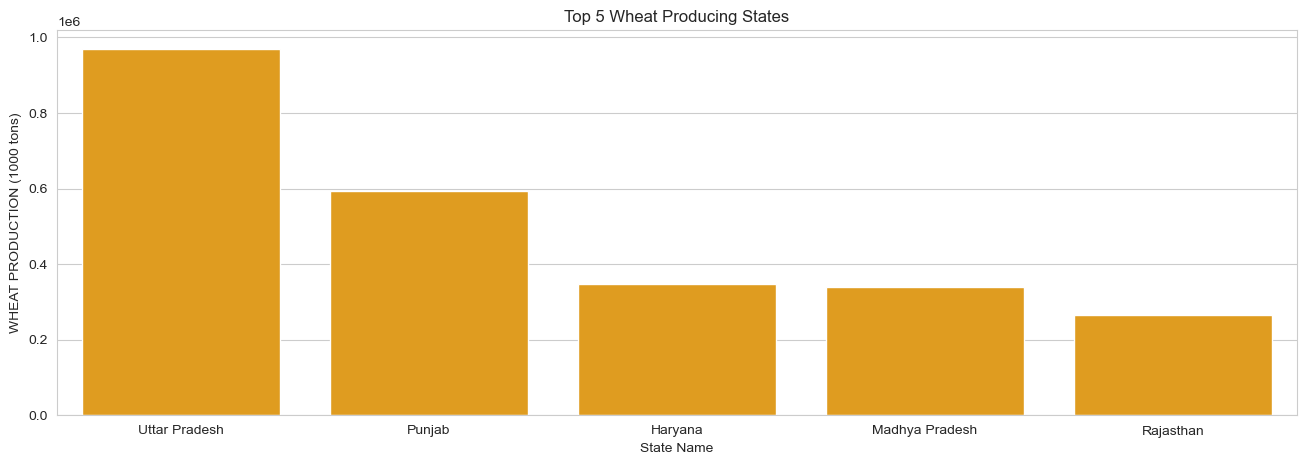

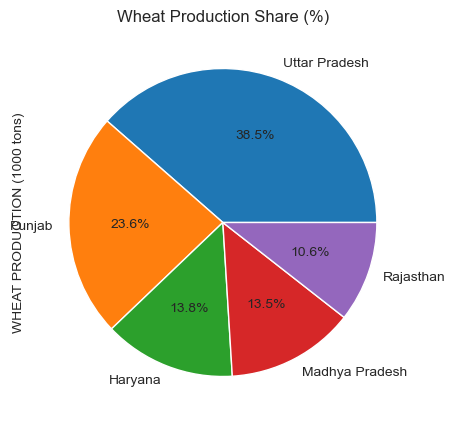

In [17]:
# Top 5 Wheat producing states
wheat_top5 = df_clean.groupby('State Name')['WHEAT PRODUCTION (1000 tons)'].sum().sort_values(ascending=False).head(5)
# Bar
sns.barplot(wheat_top5,color='orange')
plt.title("Top 5 Wheat Producing States")
plt.ylabel("WHEAT PRODUCTION (1000 tons)")
plt.show()
# Pie
wheat_top5.plot(kind='pie', autopct='%1.1f%%', startangle=360)
plt.title("Wheat Production Share (%)")
plt.show()

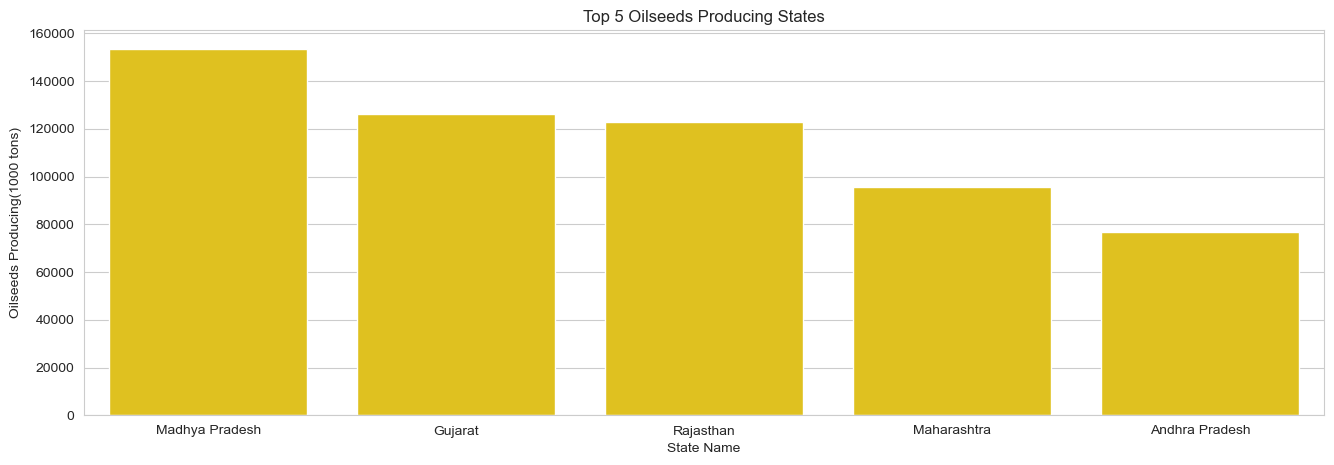

In [18]:
# Top 5 Oilseeds producing states
oilseed_top5 = df_clean.groupby('State Name')['OILSEEDS PRODUCTION (1000 tons)'].sum().sort_values(ascending=False).head(5)
sns.barplot(oilseed_top5,color='gold')
plt.title("Top 5 Oilseeds Producing States")
plt.ylabel("Oilseeds Producing(1000 tons)")
plt.show()

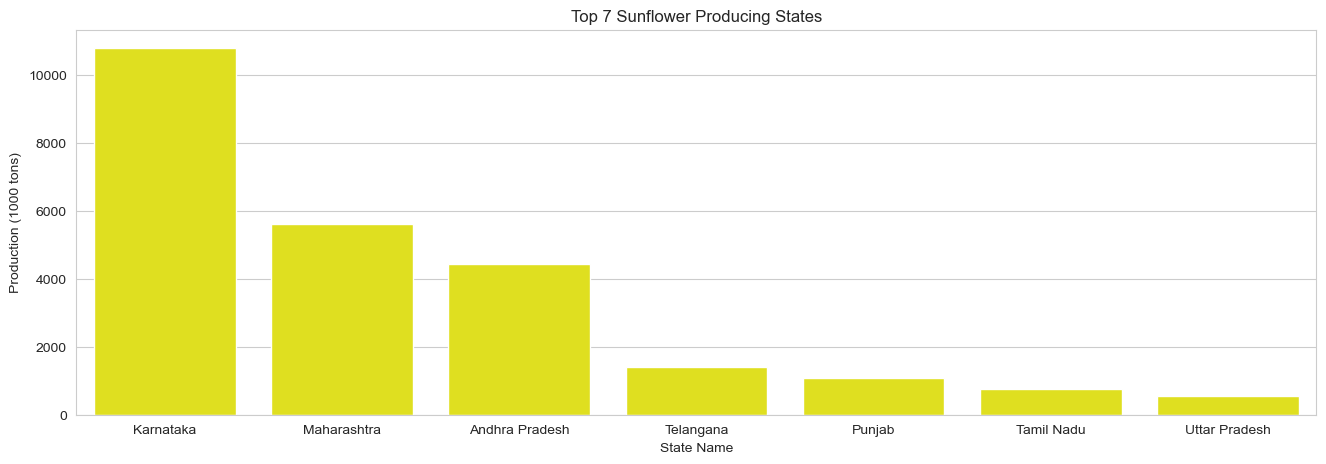

In [19]:
# Top 7 Sunflower producing states
sunflower_top7 = df_clean.groupby('State Name')['SUNFLOWER PRODUCTION (1000 tons)'].sum().sort_values(ascending=False).head(7)
sns.barplot(sunflower_top7,color='yellow')
plt.title("Top 7 Sunflower Producing States")
plt.ylabel("Production (1000 tons)")
plt.show()

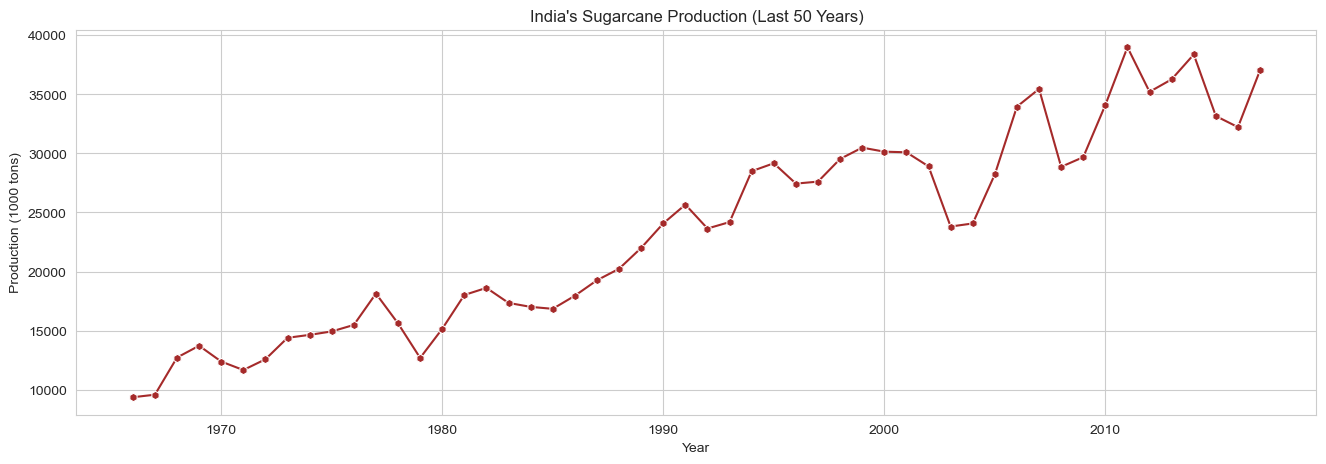

In [20]:
# Sugarcane Production From Last 50 Years
sugarcane_trend = df_clean.groupby('Year')['SUGARCANE PRODUCTION (1000 tons)'].sum()
sns.lineplot(sugarcane_trend,marker='h', color='brown')
plt.title("India's Sugarcane Production (Last 50 Years)")
plt.ylabel("Production (1000 tons)")
plt.xlabel("Year")
plt.show()

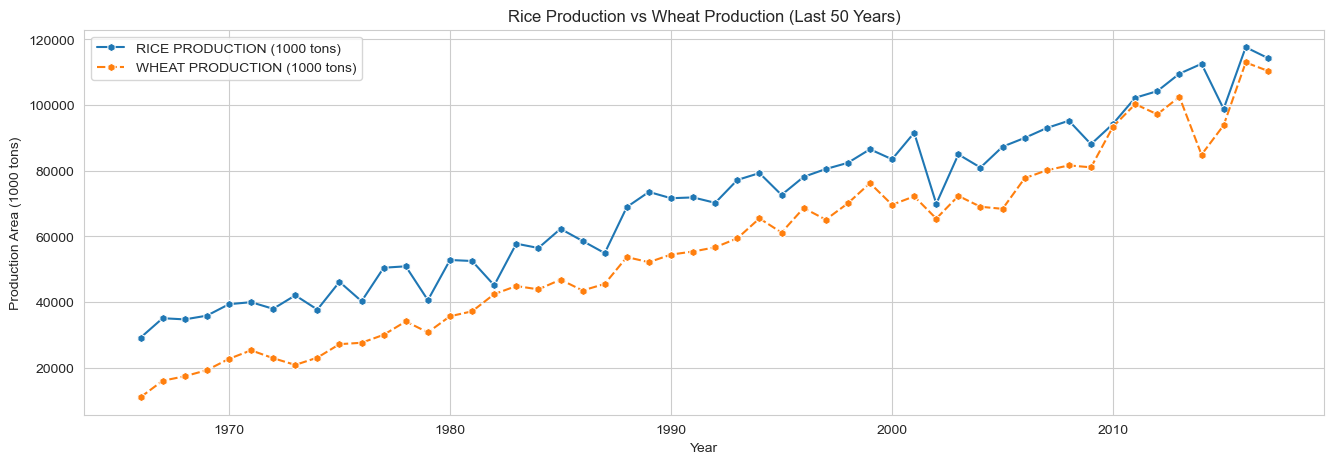

In [21]:
# Rice Production Vs Wheat Production (Last 50y)
crop_trend = df_clean.groupby('Year')[['RICE PRODUCTION (1000 tons)', 'WHEAT PRODUCTION (1000 tons)']].sum()
sns.lineplot(crop_trend,marker='h')
plt.title("Rice Production vs Wheat Production (Last 50 Years)")
plt.ylabel("Production Area (1000 tons)")
plt.show()

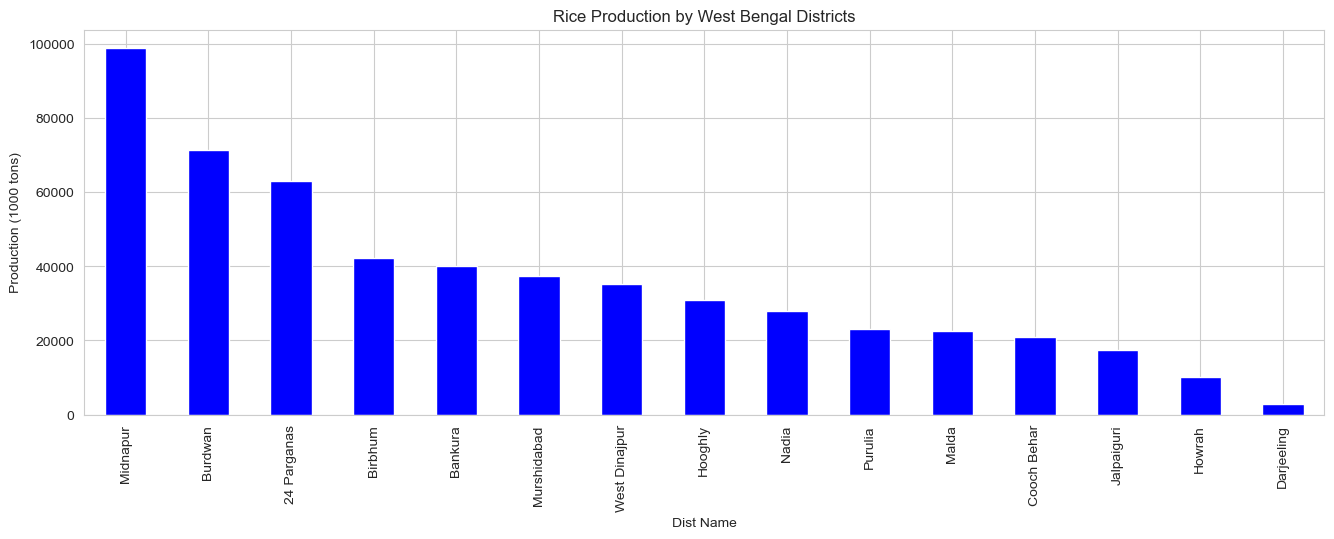

In [22]:
# Rice Production By West Bengal Districts
wb_rice = df_clean[df_clean['State Name']=='West Bengal'].groupby('Dist Name')['RICE PRODUCTION (1000 tons)'].sum().sort_values(ascending=False)
wb_rice.plot(kind='bar',color='blue')
plt.title("Rice Production by West Bengal Districts")
plt.ylabel("Production (1000 tons)")
plt.show()

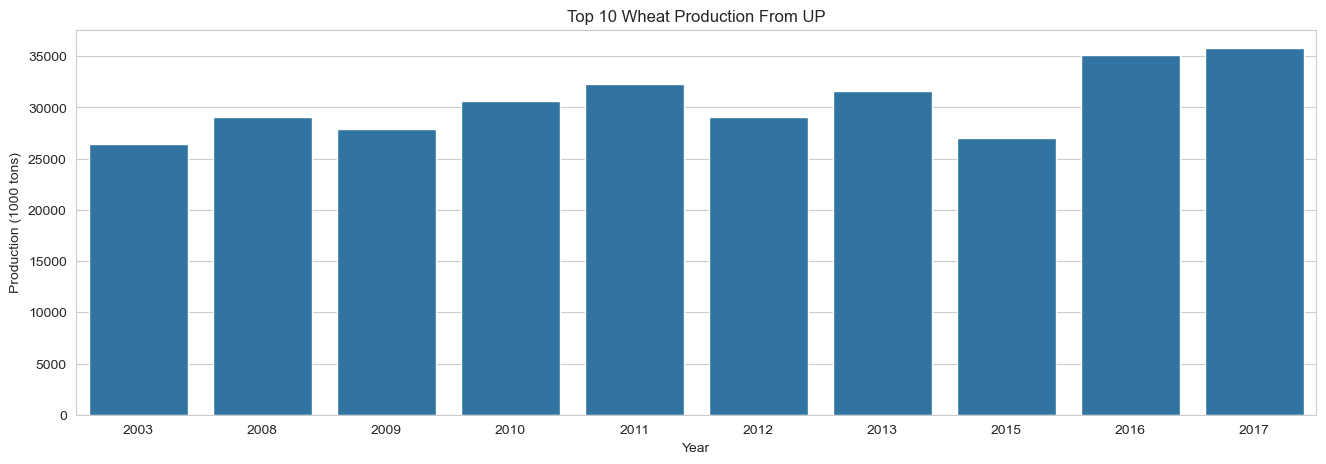

In [23]:
# Wheat Production By Uttar Pradesh Districts
up_wheat = df_clean[df_clean['State Name']=='Uttar Pradesh'].groupby('Year')['WHEAT PRODUCTION (1000 tons)'].sum().sort_values(ascending=False).head(10)
sns.barplot(up_wheat)
plt.title("Top 10 Wheat Production From UP")
plt.ylabel("Production (1000 tons)")
plt.show()

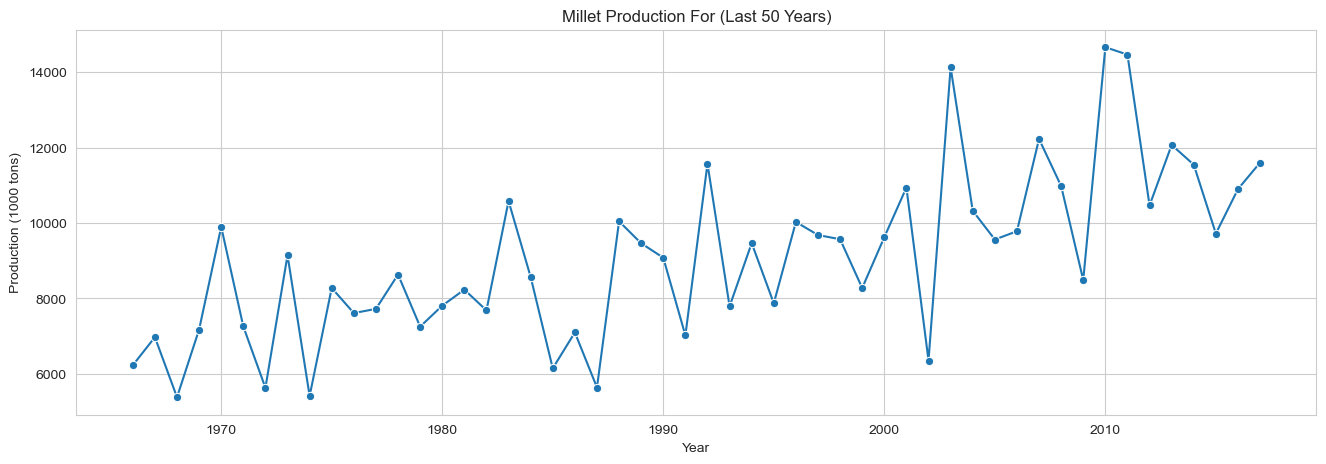

In [24]:
# Millet Production
millet_trend = df_clean.groupby('Year')[['PEARL MILLET PRODUCTION (1000 tons)','FINGER MILLET PRODUCTION (1000 tons)']].sum().sum(axis=1)
sns.lineplot(millet_trend,marker='o')
plt.title("Millet Production For (Last 50 Years)")
plt.ylabel("Production (1000 tons)")
plt.show()

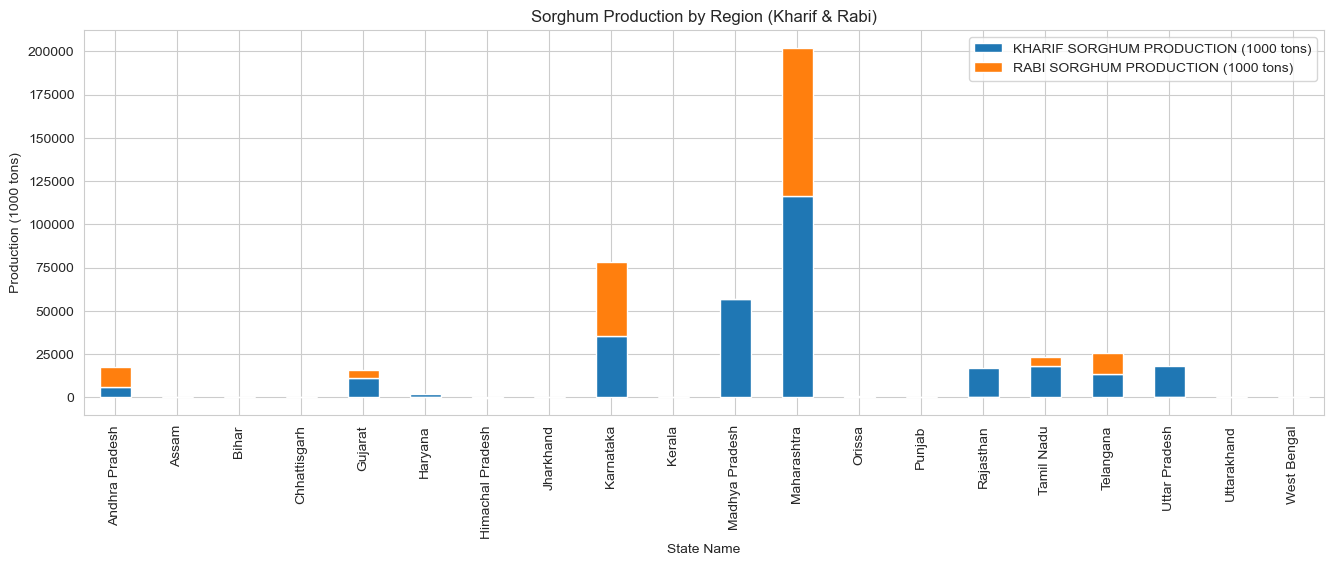

In [25]:
# Sorghum Production (Kharif and Rabi) by Region
sorghum_region = df_clean.groupby('State Name')[['KHARIF SORGHUM PRODUCTION (1000 tons)','RABI SORGHUM PRODUCTION (1000 tons)']].sum()
sorghum_region.plot(kind='bar', stacked=True)
plt.title("Sorghum Production by Region (Kharif & Rabi)")
plt.ylabel("Production (1000 tons)")
plt.show()

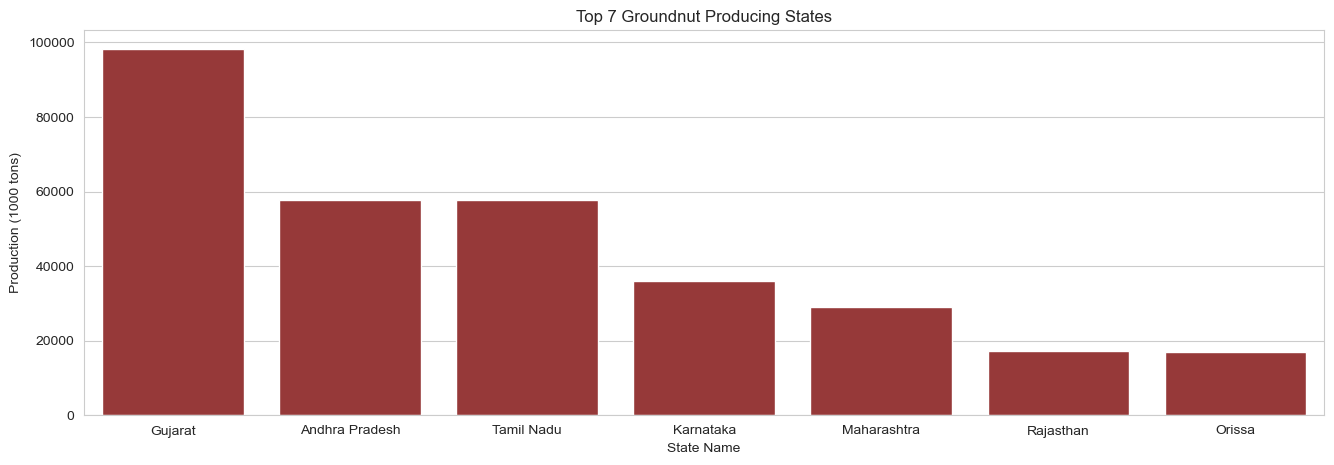

In [26]:
# Top 7 States for Groundnut Production
groundnut_top7 = df_clean.groupby('State Name')['GROUNDNUT PRODUCTION (1000 tons)'].sum().sort_values(ascending=False).head(7)
sns.barplot(groundnut_top7,color='Brown')
plt.title("Top 7 Groundnut Producing States")
plt.ylabel("Production (1000 tons)")
plt.show()

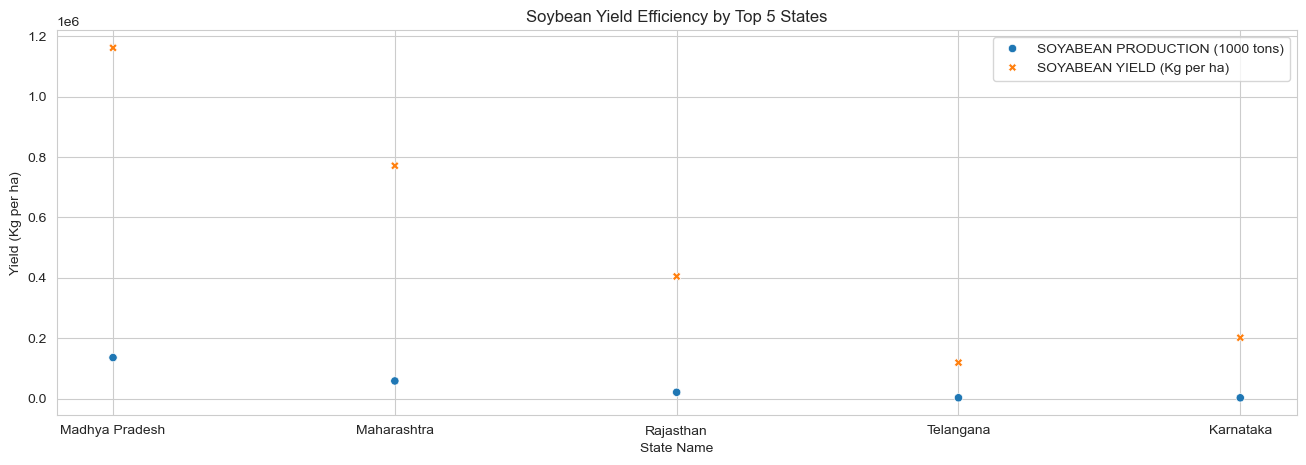

In [27]:
# Soybean Production by Top 5 States and Yield Efficiency
soybean_top5 = df_clean.groupby('State Name')[['SOYABEAN PRODUCTION (1000 tons)','SOYABEAN YIELD (Kg per ha)']].sum().sort_values(by='SOYABEAN PRODUCTION (1000 tons)', ascending=False).head(5)
sns.scatterplot(soybean_top5)
plt.title("Soybean Yield Efficiency by Top 5 States")
plt.ylabel("Yield (Kg per ha)")
plt.show()

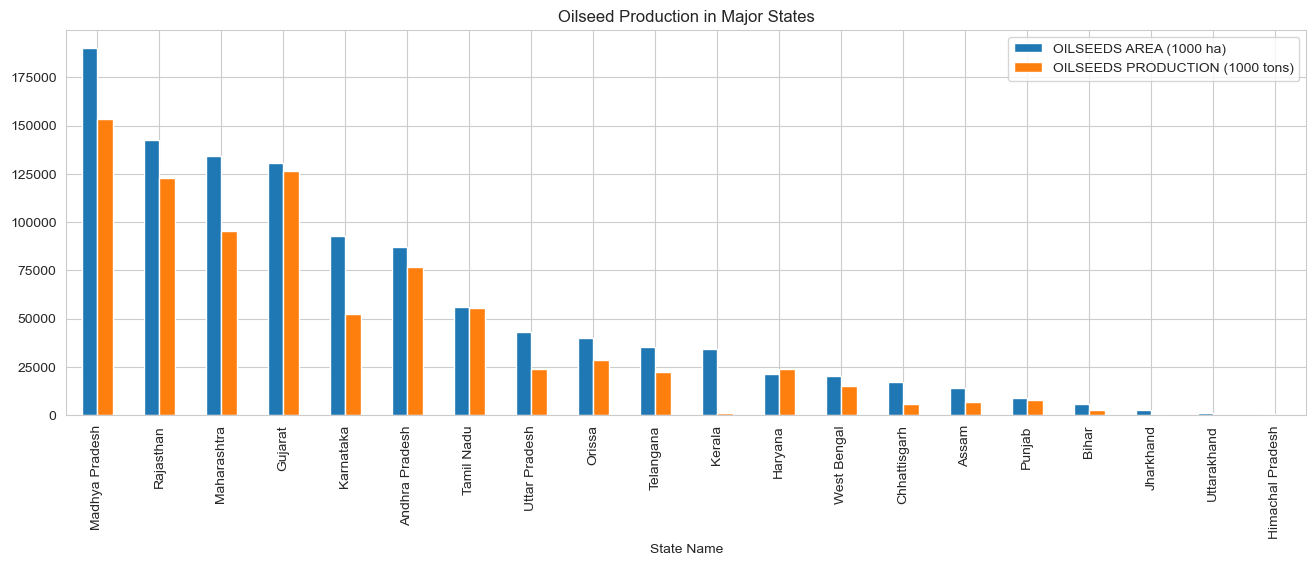

In [28]:
# Oilseed Production by State
oilseed_major = df_clean.groupby('State Name')[['OILSEEDS AREA (1000 ha)','OILSEEDS PRODUCTION (1000 tons)']].sum().sort_values(by='OILSEEDS AREA (1000 ha)', ascending=False)
oilseed_major.plot(kind='bar')
plt.title("Oilseed Production in Major States")
plt.show()

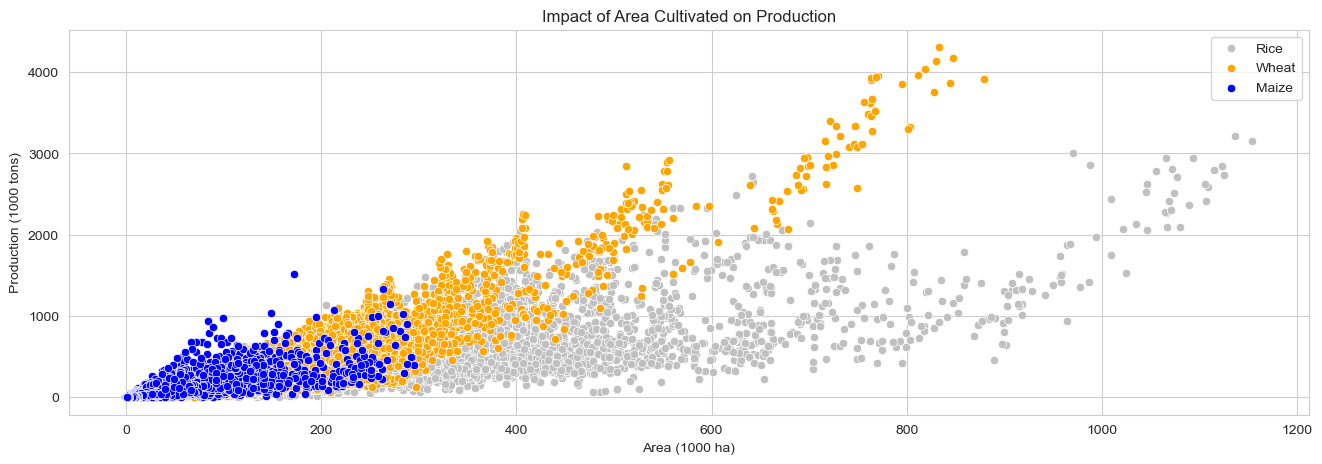

In [29]:
# Impact of Area Cultivated on Production (Rice, Wheat, Maize)
sns.scatterplot(data=df_clean, x='RICE AREA (1000 ha)', y='RICE PRODUCTION (1000 tons)', label='Rice',color='silver')
sns.scatterplot(data=df_clean, x='WHEAT AREA (1000 ha)', y='WHEAT PRODUCTION (1000 tons)', label='Wheat',color='orange')
sns.scatterplot(data=df_clean, x='MAIZE AREA (1000 ha)', y='MAIZE PRODUCTION (1000 tons)', label='Maize',color='blue')
plt.title("Impact of Area Cultivated on Production")
plt.ylabel("Production (1000 tons)")
plt.xlabel("Area (1000 ha)")
plt.legend()
plt.show()

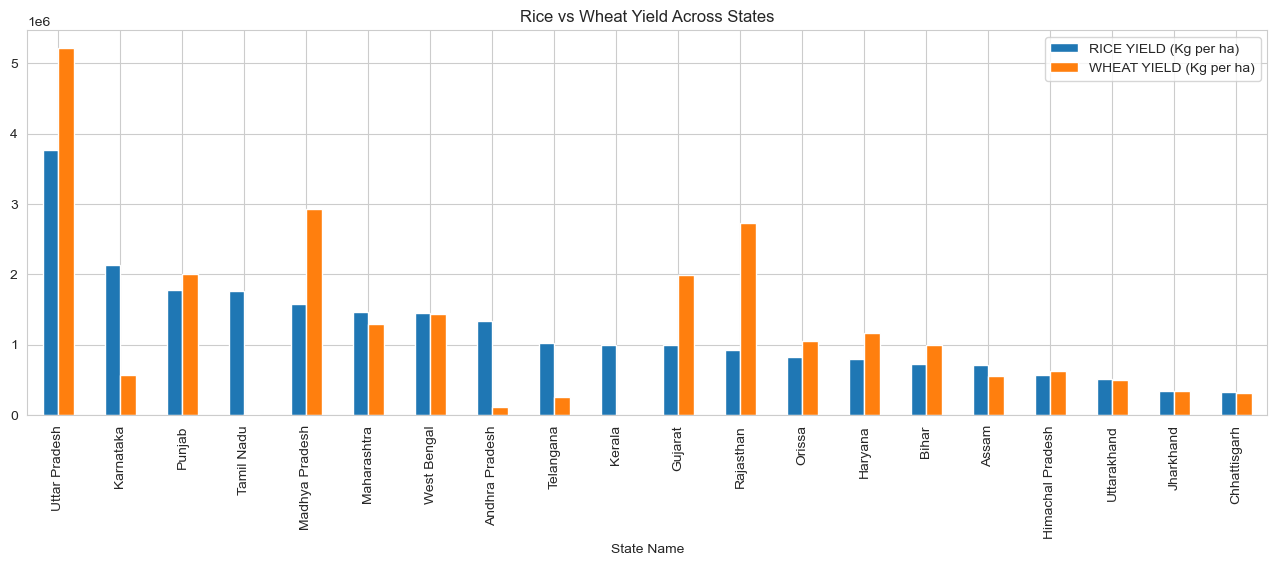

In [30]:
# Rice vs Wheat Yield Across States
ricevsweat=df_clean.groupby('State Name')[['RICE YIELD (Kg per ha)','WHEAT YIELD (Kg per ha)']].sum().sort_values(by='RICE YIELD (Kg per ha)', ascending=False)
ricevsweat.plot(kind='bar')
plt.title("Rice vs Wheat Yield Across States")
plt.show()

In [31]:
#6) Columns Remane
df_clean.columns = (
    df_clean.columns
    .str.strip()  # remove leading/trailing spaces
    .str.lower()  # make lowercase
    .str.replace(r"\(.*\)", "", regex=True)  # remove text inside ()
    .str.replace(" ", "_")  # replace spaces with underscores
    .str.replace("__", "_")  # collapse double underscores
)
df_clean.columns = df_clean.columns.str.rstrip('_')  # remove trailing underscore
print(df_clean.columns.tolist())

['dist_code', 'year', 'state_code', 'state_name', 'dist_name', 'rice_area', 'rice_production', 'rice_yield', 'wheat_area', 'wheat_production', 'wheat_yield', 'kharif_sorghum_area', 'kharif_sorghum_production', 'kharif_sorghum_yield', 'rabi_sorghum_area', 'rabi_sorghum_production', 'rabi_sorghum_yield', 'sorghum_area', 'sorghum_production', 'sorghum_yield', 'pearl_millet_area', 'pearl_millet_production', 'pearl_millet_yield', 'maize_area', 'maize_production', 'maize_yield', 'finger_millet_area', 'finger_millet_production', 'finger_millet_yield', 'barley_area', 'barley_production', 'barley_yield', 'chickpea_area', 'chickpea_production', 'chickpea_yield', 'pigeonpea_area', 'pigeonpea_production', 'pigeonpea_yield', 'minor_pulses_area', 'minor_pulses_production', 'minor_pulses_yield', 'groundnut_area', 'groundnut_production', 'groundnut_yield', 'sesamum_area', 'sesamum_production', 'sesamum_yield', 'rapeseed_and_mustard_area', 'rapeseed_and_mustard_production', 'rapeseed_and_mustard_yield'

In [32]:
#6) Save New Cleaned Data For Sql
df_clean.to_csv("cleaned_sql_agriculture_data.csv", index=False)
print("Cleaned dataset saved as: cleaned_sql_agriculture_data.csv")

Cleaned dataset saved as: cleaned_sql_agriculture_data.csv


In [33]:
#7) Connect With SQL 
myconnection = pymysql.connect(host = '127.0.0.1',user='root',passwd='selva@7007')
mycursor = myconnection.cursor()

In [35]:
# Create Data Base
mycursor.execute("create database if not exists agridata")

1

In [34]:
mycursor.execute('use agridata')

0

In [38]:
# Create Table
mycursor.execute("""create table if not exists cropdata(
    dist_code INT,
    dist_name VARCHAR(100),
    state_code INT,
    state_name VARCHAR(100),
    year INT,
    rice_area FLOAT,
    rice_production FLOAT,
    rice_yield FLOAT,
    wheat_area FLOAT,
    wheat_production FLOAT,
    wheat_yield FLOAT,
    oilseeds_area FLOAT,
    oilseeds_production FLOAT,
    oilseeds_yield FLOAT,
    sugarcane_area FLOAT,
    sugarcane_production FLOAT,
    sugarcane_yield FLOAT,
    cotton_area FLOAT,
    cotton_production FLOAT,
    cotton_yield FLOAT,
    maize_area FLOAT,
    sorghum_area FLOAT,               
    sorghum_production FLOAT,       
    sorghum_yield FLOAT,
    barley_area FLOAT,               
    barley_production FLOAT,          
    barley_yield FLOAT,               
    chickpea_area FLOAT,             
    chickpea_production FLOAT,        
    chickpea_yield FLOAT,            
    pigeonpea_area FLOAT,           
    pigeonpea_production FLOAT,  
    pigeonpea_yield FLOAT,
    minor_pulses_area FLOAT,    
    minor_pulses_production FLOAT,
    minor_pulses_yield FLOAT,
    fruits_area FLOAT,       
    vegetables_area FLOAT,
    fruits_and_vegetables_area FLOAT,
    potatoes_area FLOAT,          
    onion_area FLOAT,                
    fodder_area FLOAT,
    sesamum_area FLOAT,                   
    sesamum_production FLOAT,            
    sesamum_yield FLOAT,                
    rapeseed_and_mustard_area FLOAT,    
    rapeseed_and_mustard_production FLOAT,
    rapeseed_and_mustard_yield FLOAT, 
    safflower_area FLOAT,
    safflower_production FLOAT,    
    safflower_yield FLOAT,             
    castor_area FLOAT,              
    castor_production FLOAT,       
    castor_yield FLOAT,        
    linseed_area FLOAT,    
    linseed_production FLOAT,
    linseed_yield FLOAT,
    maize_production FLOAT,
    maize_yield FLOAT,
    groundnut_area FLOAT,
    groundnut_production FLOAT,
    groundnut_yield FLOAT,
    sunflower_area FLOAT,
    sunflower_production FLOAT,
    sunflower_yield FLOAT,
    kharif_sorghum_area FLOAT,
    kharif_sorghum_production FLOAT,
    kharif_sorghum_yield FLOAT,
    rabi_sorghum_area FLOAT,
    rabi_sorghum_production FLOAT,
    rabi_sorghum_yield FLOAT,
    soyabean_area FLOAT,
    soyabean_production FLOAT,
    soyabean_yield FLOAT,
    finger_millet_area FLOAT,
    finger_millet_production FLOAT,
    finger_millet_yield FLOAT,
    pearl_millet_area FLOAT,
    pearl_millet_production FLOAT,
    pearl_millet_yield FLOAT,
    PRIMARY KEY (dist_code, year)
    
)
""")
myconnection.commit()
print("Table created successfully!")

Table created successfully!


In [39]:
# Get all column names from DataFrame
columns = df_clean.columns.tolist()

# Create placeholders for each column value
placeholders = ', '.join(['%s'] * len(columns))
insert_column_names = ', '.join(columns)

# Inserting query
insert_query = f"insert into cropdata ({insert_column_names}) values ({placeholders})"

# Convert dataframe rows to list of tuples
data = [tuple(row) for row in df.to_numpy()]
mycursor.executemany(insert_query, data)
myconnection.commit()
print("Data successfully loaded into MySQL table!")

Data successfully loaded into MySQL table!
